<div style="text-align:center"><span style="font-family:Georgia; font-size:2em; font-weight:bold">Classifying hand position using Inertial Measurement Unit</span></div>

### Introduction: 

In this project we present the development and implementation of an Inertial Measurement Unit  device which is used to collect data(accelerometer,gyroscope,magnetometer) from different position of the human hand.

### Description:
The data of the IMU are collected from both hand at five different position (10 position in total),The position of the hand is shown in Fig 1 and Fig 2.

<img width=500 src="image/class1_6.jpg"/>

<center>Fig 1: Subject holding IMU at position 1 to 6</center>


<img width=500 src="image/class7_10.jpg"/>

<center>Fig 2: Subject holding IMU at position 7 to 10</center>

From each position we have collected 250 sets of reading than we label this reading according to their position (eg:for position 1 its 1),then each position dataset is recompile to a larger dataset where every position data are stored.The size of this recompile data set is 1500 by 10.This dataset is then split into 30/70 ratio,30% for testing process and 70% is for training process.We used decision tree to classify those 10 different position and we have found that by using gini index as the decision tree criterion we get 39%  accuracy and by using information gain as the decision tree criterion we get 81% accuracy.
### Hardware used:
1. MPU 9250 9 axis IMU
2. Arduino Nano
3. DS 1307 RTC module
4. Micro SD Car

<img width=300 src="image/hardware.jpg">

### Hardware Description: 
The device is assembled according to the given image Fig 2.The MPU 9250(IMU) send 3 set of data to arduino nano from 3 sensors,The sensors are accelerometer,gyroscope and magnetometer.The DS 1307 rtc is a real time clock module which give the time stamp for each reading.This reading is collected by arduino nano and write it in a csv file using the micro sd card module.

### Data collection and preprocessing:
We have collected 10 set of data (350+ reading) by holding the hand at 10 different  position (**shown in Fig:1 & 2)**.We have discarded 50 reading from the top and 50 reading from the bottom because those reading contain the most noise (the hand is not stationary).The x,y and z axis of the accelerometer,gyroscope and magnetometer is the feature of this problem.We don’t consider timestamp(rtc reading) as the feature of this problem.We have label each of this reading according to their positional value and recompile into a larger data set (dataset.csv).This large data set is then split into 30/70 ratio,30% as training data and 70% as testing data.Before splitting the data we have shuffle the row so that each part(training and testing) get fair number of classes.
### Decision Tree:
We have modeled our decision tree into two classifiers,One classifier with gini index and another one is with information gain as the criterion.For both of the classifier we use max_depth= 3 , min_sample_leaf=5 and a random_state=100.Using gini index as the criterion we get 39% accuracy and 81% accuracy when we used information gain as the criterion.

###Dataset :

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn import tree

In [44]:
imu_data = pd.read_csv("Dataset/Dataset.csv")

In [45]:
imu_data.head()

,1.374342,-9.06491,-5.224414,-0.324076,0.16569,0.282479,-3.702203,32.476425,36.428134,1
0,1.324061,-9.108008,-4.994559,-0.350175,0.112426,0.269429,-4.936271,33.363761,37.625305,1
1,1.422228,-9.153500,-5.025685,-0.342185,0.121214,0.268098,-4.054794,32.831359,36.086086,1
2,1.388708,-9.036178,-5.114275,-0.361893,0.098843,0.250254,-4.759976,33.896160,36.428134,1
3,1.297723,-9.167866,-5.006531,-0.351240,0.077005,0.260907,-5.465157,33.896160,34.375846,1
4,1.288146,-9.160683,-5.104698,-0.337658,0.100441,0.242531,-4.054794,33.896160,37.112232,1


In [46]:
imu_shuffle_data = shuffle(imu_data)

#### Sample Dataset

In [47]:
imu_shuffle_data.head()

,1.374342,-9.06491,-5.224414,-0.324076,0.16569,0.282479,-3.702203,32.476425,36.428134,1
1633,-2.145314,-8.061688,2.743895,-0.728836,0.230561,0.149976,-4.407385,53.062576,16.589338,7
1957,-0.335205,10.001091,-0.778155,0.413399,-0.074940,0.018578,17.805835,10.825476,-24.114400,8
1023,-0.220278,9.512648,-0.045492,-0.239599,1.191131,-0.398166,14.456223,3.194403,9.235302,5
1914,-0.158025,9.910106,-0.677594,0.417394,-0.073875,0.036422,17.276948,11.357876,-24.285423,8
1081,-0.272953,9.711378,0.471682,-0.127212,1.098718,-0.432788,11.635497,1.419734,13.339881,5


In [48]:
print ("Dataset Lenght:: "+ str(len(imu_shuffle_data)))
print ("Dataset Shape:: "+str(imu_shuffle_data.shape))

Dataset Lenght:: 2409
Dataset Shape:: (2409, 10)


### seperating label column and feature colum

In [49]:
X = imu_shuffle_data.values[:,0:9]
Y = imu_shuffle_data.values[:,-1]

### Splitting test data and training data

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

### Decision tree classifier with gini index as criterion

In [51]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

### Decision tree classifier with information gain as criterion

In [52]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

### Sample prediction result

In [53]:
clf_gini.predict([[-1.053502,-9.151105,-4.968222,-0.525817,-0.22892,-0.382496,-35.96426,42.592033,5.81482
]])

array([6.])

### prediction using gini index as criterion

In [54]:
y_pred = clf_gini.predict(X_test)
y_pred

array([7., 8., 8., 7., 8., 8., 8., 8., 8., 8., 8., 6., 8., 8., 8., 8., 8.,
       8., 8., 6., 8., 8., 8., 8., 8., 7., 8., 8., 8., 8., 8., 8., 6., 8.,
       8., 7., 8., 8., 8., 8., 7., 8., 4., 4., 4., 4., 8., 8., 4., 8., 8.,
       7., 6., 6., 8., 8., 4., 7., 6., 8., 7., 8., 8., 8., 8., 8., 8., 7.,
       8., 8., 8., 8., 4., 7., 8., 4., 4., 8., 8., 6., 8., 8., 6., 8., 8.,
       4., 7., 8., 6., 4., 8., 8., 8., 6., 8., 8., 8., 8., 8., 6., 8., 8.,
       8., 8., 8., 8., 4., 8., 8., 8., 8., 6., 8., 8., 8., 8., 8., 8., 4.,
       7., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 4., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 6., 4., 8., 7., 8., 8., 8., 6., 8., 8.,
       8., 8., 4., 8., 8., 8., 8., 6., 8., 8., 8., 8., 4., 8., 4., 4., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 4., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 7., 8., 4., 8., 8., 4., 8., 8., 8., 8., 4., 8., 6., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 6., 8., 8.,
       8., 8., 8., 7., 7.

### Prediction usin Information gain as criterion

In [55]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([7., 5., 4., 7., 2., 8., 3., 2., 4., 1., 1., 6., 3., 3., 5., 5., 5.,
       4., 3., 6., 5., 3., 2., 3., 3., 7., 4., 1., 3., 3., 3., 1., 6., 8.,
       2., 7., 2., 3., 3., 5., 7., 8., 4., 4., 4., 4., 1., 3., 4., 8., 5.,
       7., 6., 6., 2., 1., 4., 7., 6., 3., 6., 8., 2., 8., 5., 1., 5., 7.,
       8., 5., 8., 3., 4., 7., 8., 4., 4., 3., 5., 6., 5., 3., 6., 4., 1.,
       4., 7., 2., 6., 4., 3., 3., 1., 6., 4., 8., 8., 3., 1., 6., 5., 2.,
       3., 1., 1., 2., 4., 5., 4., 5., 3., 6., 2., 3., 3., 5., 3., 4., 4.,
       7., 3., 1., 3., 3., 2., 2., 3., 4., 3., 5., 3., 3., 4., 3., 8., 3.,
       3., 2., 5., 4., 2., 1., 1., 6., 4., 5., 7., 8., 3., 3., 6., 8., 3.,
       1., 4., 4., 8., 5., 4., 1., 6., 2., 5., 2., 8., 4., 3., 4., 4., 4.,
       1., 8., 1., 8., 4., 3., 1., 3., 4., 1., 3., 5., 3., 5., 1., 3., 3.,
       1., 4., 1., 7., 5., 4., 2., 8., 4., 8., 3., 3., 1., 4., 2., 6., 3.,
       3., 1., 3., 5., 5., 5., 3., 5., 8., 5., 3., 1., 5., 1., 6., 8., 5.,
       2., 1., 1., 7., 7.

### Result

In [56]:
print ("Accuracy is "+str( accuracy_score(y_test,y_pred)*100))

Accuracy is 38.17427385892116


In [57]:
print ("Accuracy is "+ str(accuracy_score(y_test,y_pred_en)*100))

Accuracy is 81.74273858921161


### Confusion matrix using gini index as criterion

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
labels = [1,2,3,4,5,6,7,8,9,10]
cm_gini = confusion_matrix(y_test, y_pred,labels)
print(cm_gini)

[[ 0  0  0  0  0  0  0 83  0  0]
 [ 0  0  0  0  0  0  0 74  0  0]
 [ 0  0  0  0  0  0  0 78  0  0]
 [ 0  0  0 73  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 81  0  0]
 [ 0  0  0  0  0 65  0  0  0  0]
 [ 0  0  0  0  0  0 72  0  0  0]
 [ 0  0  0  0  0  0  0 66  0  0]
 [ 0  0  0  0  0  0  0 87  0  0]
 [ 0  0  0  1  0  0  0 43  0  0]]


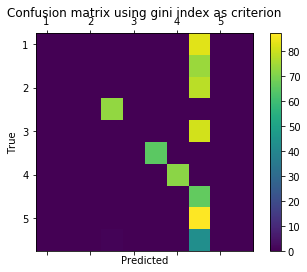

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_gini)
plt.title('Confusion matrix using gini index as criterion')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Confusion matrix using information gain as criterion

In [60]:
cm = confusion_matrix(y_test, y_pred_en,labels)
print(cm)

[[83  0  0  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0  0  0]
 [ 0  0 78  0  0  0  0  0  0  0]
 [ 0  0  0 73  0  0  0  0  0  0]
 [ 0  0  0  0 81  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  0]
 [ 0  0  0  0  0  1 71  0  0  0]
 [ 0  0  0  0  0  0  0 66  0  0]
 [ 0  1 86  0  0  0  0  0  0  0]
 [ 0  3  0 41  0  0  0  0  0  0]]


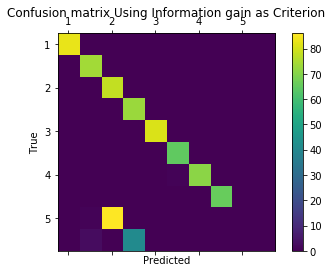

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix Using Information gain as Criterion')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()